In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Загрузим данные из файла nums2.txt и построим гистограмму, разделив числовую прямую на 10 промежутков

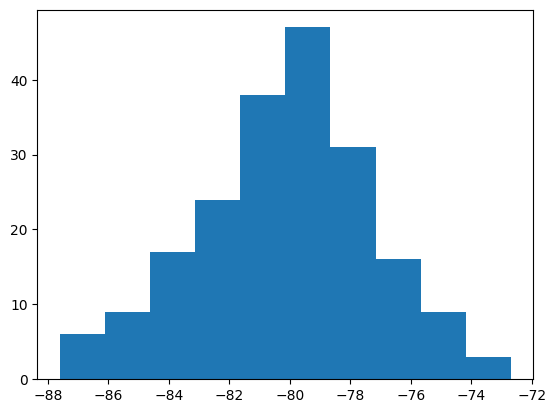

In [2]:
arr = np.loadtxt("nums2.txt")
plt.hist(arr, bins=10);

Разделим числовую прямую на 10 промежутков, как на гистограмме

In [3]:
space = np.linspace(np.min(arr), np.max(arr) + 0.1, 11)
print(*space)

-87.6 -86.1 -84.6 -83.1 -81.6 -80.1 -78.6 -77.10000000000001 -75.60000000000001 -74.10000000000001 -72.60000000000001


Получим среднее значение каждого промежутка и вероятность попадания туда числа из выборки

In [4]:
data = pd.DataFrame({'left': space[0:-1], 'right': space[1:], 'count': 0})
data['avg'] = (data['left'] + data['right']) / 2
for i, row in data.iterrows():
    data.loc[i, 'count'] = np.sum(np.logical_and(arr >= row['left'], arr < row['right']))
data['probability'] = data['count'] / len(arr)
print(data)

   left  right  count    avg  probability
0 -87.6  -86.1      6 -86.85        0.030
1 -86.1  -84.6      9 -85.35        0.045
2 -84.6  -83.1     17 -83.85        0.085
3 -83.1  -81.6     24 -82.35        0.120
4 -81.6  -80.1     38 -80.85        0.190
5 -80.1  -78.6     47 -79.35        0.235
6 -78.6  -77.1     31 -77.85        0.155
7 -77.1  -75.6     16 -76.35        0.080
8 -75.6  -74.1      9 -74.85        0.045
9 -74.1  -72.6      3 -73.35        0.015


Построим график функции распределения

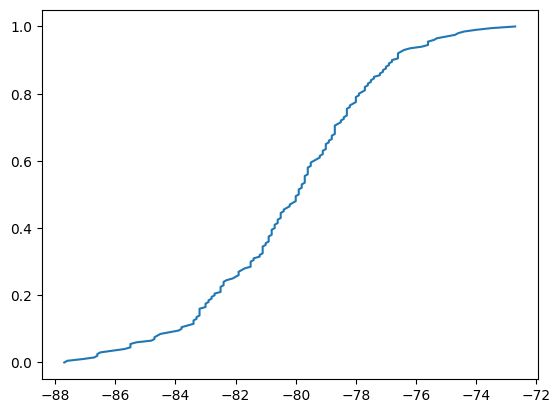

In [5]:
sortedArr = np.sort(arr)
prob = np.linspace(0, 1, len(arr) + 1)
plt.plot(np.append(sortedArr.min()-0.1, sortedArr), prob);

Получим приближенно выборочное среднее и дисперсию

In [6]:
avg = data.loc[data['count'].idxmax()]['avg']
data['normalised'] = data['avg'] - avg
data['normalised * n'] = data['normalised'] * data['count']
data['normalised square * n'] = data['count'] * data['normalised'] ** 2
E = avg + data['normalised * n'].sum() / data['count'].sum()
D = data['normalised square * n'].sum() / data['count'].sum() + (data['normalised * n'].sum() / data['count'].sum()) ** 2
print(f'приближенно выборочное среднее {E}, дисперсия {D}')

приближенно выборочное среднее -80.1075, дисперсия 9.630056249999987
